In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time

In [3]:
# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load train and test data
train_data = pd.read_csv('/home/brave/Desktop/archive(1)/Train_data.csv')
test_data = pd.read_csv('/home/brave/Desktop/archive(1)/Test_data.csv')

In [5]:
# Descriptive statistics
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
items = list(train_data)

In [8]:
train_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [9]:
'class' in test_data

False

In [11]:
train_data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [8]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_data['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [7]:
# Numeric Attributes scaling
scaler = StandardScaler()
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
scale_train = scaler.fit_transform(train_data.select_dtypes(include=['float64','int64']))
scale_test = scaler.transform(test_data.select_dtypes(include = ['float64','int64']))

In [8]:
# Turning the results back into a dataframe
scale_train_data_frame = pd.DataFrame(scale_train, columns = num_cols)
scale_test_data_frame = pd.DataFrame(scale_test, columns = num_cols)

In [9]:
# extract categorical attributes from both training and test sets 
categorical_train = train_data.select_dtypes(include=['object']).copy()
categorical_test = test_data.select_dtypes(include=['object']).copy()

In [10]:
# Encoding categorical attributes
encoder = LabelEncoder()

# encode the categorical attributes
train_categorical = categorical_train.apply(encoder.fit_transform)
test_categorical = categorical_test.apply(encoder.fit_transform)

In [11]:
# separate target column from encoded data 
encode_train = train_categorical.drop(['class'], axis=1)
Y_categorical_train = train_categorical[['class']].copy()

In [12]:
# Combining scaled numeric and encoded categorical attributes
train_x = pd.concat([scale_train_data_frame, encode_train], axis=1)
test_x = pd.concat([scale_test_data_frame, test_categorical], axis=1)
train_y = train_data['class']
print(f'The data used for trainining the model has {train_x.shape[0]} rows and {train_x.shape[1]} columns')

The data used for trainining the model has 25192 rows and 41 columns


In [13]:
test_data_frame = pd.concat([scale_test_data_frame, test_categorical], axis=1)
print(f'The data used for testing the model has {test_data_frame.shape[0]} rows and {test_data_frame.shape[1]} columns')

The data used for testing the model has 22544 rows and 41 columns


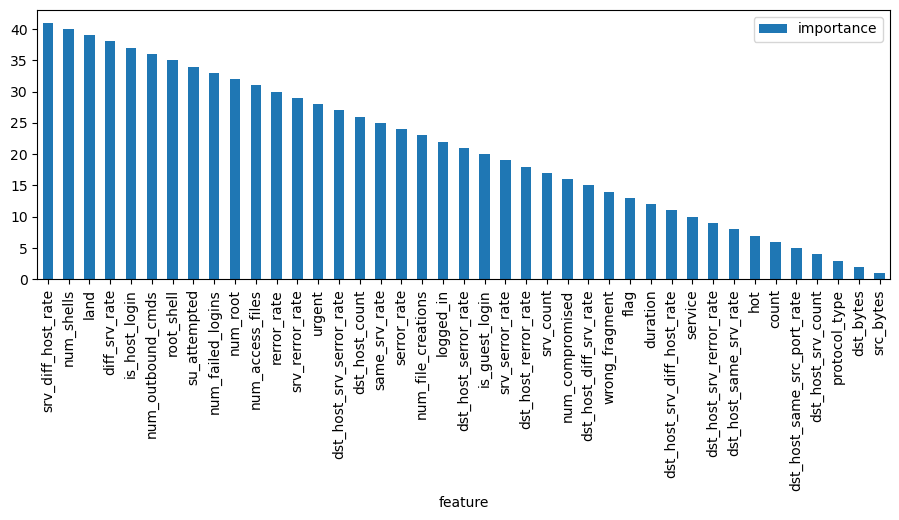

In [14]:
# feature selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Create RFE with Gradient Boosting classifier as estimator
rfe = RFE(estimator=gb_classifier, n_features_to_select=1)

# Fit RFE on the training set
rfe.fit(train_x, train_y)

# Get the feature importances from RFE
score = rfe.ranking_

# Create a DataFrame to store feature importances
importances = pd.DataFrame({'feature': train_x.columns, 'importance': score})

# Sort the importances in descending order
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Plot the importances
plt.rcParams['figure.figsize'] = (11, 3.5)
importances.plot.bar()
plt.show()

In [15]:
train_X_contigous = np.ascontiguousarray(train_x)

In [16]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X_contigous, train_y, test_size=0.2, random_state=2)

In [17]:
# Initializing models
rforest_model = RandomForestClassifier(n_estimators=100, random_state=42)
KNN_model = KNeighborsClassifier(n_jobs=-1)
LGR_model = LogisticRegression(n_jobs=-1, random_state=0)
naive_bayes_model = BernoulliNB()

In [18]:
# Training models
models = [rforest_model, KNN_model, LGR_model, naive_bayes_model]
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes']

In [19]:
for model, name in zip(models, model_names):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"{name} - Training Time: {end_time - start_time:.4f} seconds")

Random Forest - Training Time: 1.5041 seconds
K-Nearest Neighbors - Training Time: 0.0213 seconds


/home/brave/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Time: 1.5650 seconds
Naive Bayes - Training Time: 0.1418 seconds


In [20]:
# Making predictions
predictions = [model.predict(X_test) for model in models]

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=10)  # Perform cross-validation
    mean_score = scores.mean()  # Compute mean score across folds

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f"{name} Evaluation:")
    print()
    print(f'{name} Accuracy: {accuracy:.4f}:')
    print(f"Cross-Validation Mean Score: {mean_score:.4f}")
    print()
    print("Confusion Matrix:")
    print(conf_matrix)
    print()
    print("Classification Report:")
    print(report)
    print("-" * 55)

Random Forest Evaluation:

Random Forest Accuracy: 0.9970:
Cross-Validation Mean Score: 0.9973

Confusion Matrix:
[[2324    9]
 [   6 2700]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2333
      normal       1.00      1.00      1.00      2706

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

-------------------------------------------------------
K-Nearest Neighbors Evaluation:

K-Nearest Neighbors Accuracy: 0.9903:
Cross-Validation Mean Score: 0.9925

Confusion Matrix:
[[2308   25]
 [  24 2682]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2333
      normal       0.99      0.99      0.99      2706

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
wei

/home/brave/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/brave/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Logistic Regression Evaluation:

Logistic Regression Accuracy: 0.9508:
Cross-Validation Mean Score: 0.9547

Confusion Matrix:
[[2178  155]
 [  93 2613]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.96      0.93      0.95      2333
      normal       0.94      0.97      0.95      2706

    accuracy                           0.95      5039
   macro avg       0.95      0.95      0.95      5039
weighted avg       0.95      0.95      0.95      5039

-------------------------------------------------------
Naive Bayes Evaluation:

Naive Bayes Accuracy: 0.9018:
Cross-Validation Mean Score: 0.9084

Confusion Matrix:
[[1974  359]
 [ 136 2570]]

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      2333
      normal       0.88      0.95      0.91      2706

    accuracy                           0.90      5039
   macro avg       0.91      0.90      0.90      5039
weighte

In [22]:
from sklearn.metrics import roc_auc_score

for model, name in zip(models, model_names):
    predictions = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, predictions)

    print(f"{name} Evaluation:")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("-" * 40)

Random Forest Evaluation:
ROC-AUC Score: 0.9999
----------------------------------------
K-Nearest Neighbors Evaluation:
ROC-AUC Score: 0.9966
----------------------------------------
Logistic Regression Evaluation:
ROC-AUC Score: 0.9879
----------------------------------------
Naive Bayes Evaluation:
ROC-AUC Score: 0.9520
----------------------------------------


In [23]:
# predicting for test data
test_df = np.ascontiguousarray(test_data_frame)
predictions_2 = [model.predict(test_df) for model in models]

In [24]:
predictions_2

[array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
        'anomaly'], dtype=object),
 array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
        'anomaly'], dtype=object),
 array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
       dtype=object),
 array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
       dtype='<U7')]